### Summary.

Technical task:
<ol>
    <li>Crop image fragment which contains license plate</li>
    <li>Generate noise on the image</li>
    <li>Save grayscale image</li>
    <li>Read saved image</li>
    <li>Display it in enlarged form</li>
    <li>Use image filters</li>
    <li>Select filter and its input parameters which fits the best for concrete image filtering</li>
</ol>

Data preparing.

In [112]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random as rnd


def displayImage(image, color_options=None, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image)

image_path = '../03.jpg'

img = cv2.imread(image_path, 0)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Noising image.

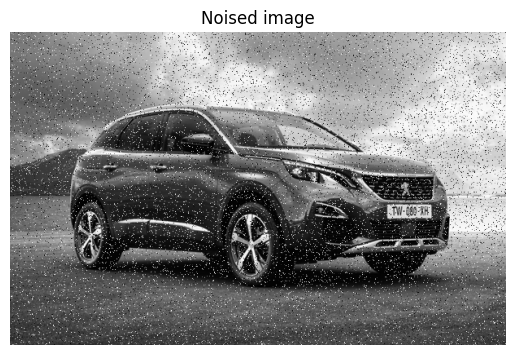

In [113]:
def generateImageNoise(source_image, noise_percent):   
    threshold = 1 - noise_percent
    
    noised_image = np.zeros(source_image.shape, np.uint8)
    
    for y in range(source_image.shape[0]):
        for x in range(source_image.shape[1]):
            rand = rnd.random()
            
            if rand > threshold:
                noised_image[y, x] = rnd.randint(0, 255)
            else:
                noised_image[y, x] = source_image[y, x]
    
    return noised_image


img = generateImageNoise(img, 0.1)

displayImage(img, title='Noised image')

Cut license plate fragment.

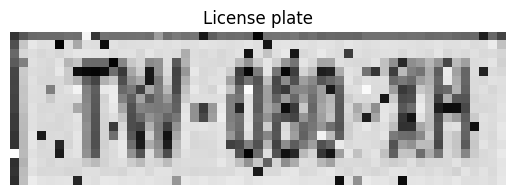

In [114]:
license_plate = img[212:229, 463:518]

displayImage(license_plate, title='License plate')

Applying Median blur filter

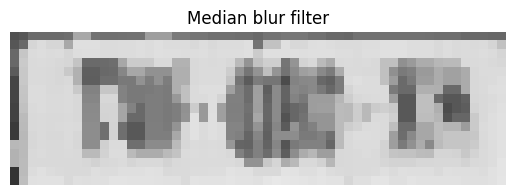

In [115]:
median_blur_license_plate = cv2.medianBlur(license_plate.copy(), 3)

displayImage(median_blur_license_plate, title='Median blur filter')

Applying Mean (filter 2D).

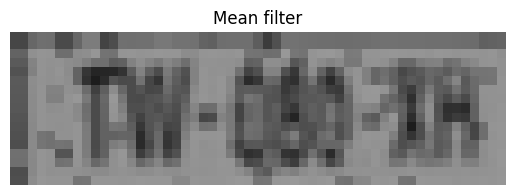

In [116]:
mean_kernel = np.ones((2, 2), np.float32) / 6
mean_filter_license_plate = cv2.filter2D(license_plate.copy(), -1, mean_kernel)

displayImage(mean_filter_license_plate, title='Mean filter')

Applying Erosion filter.

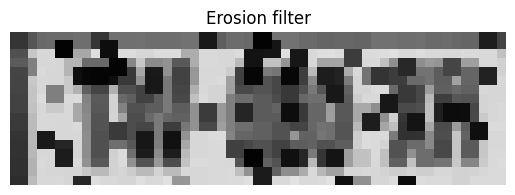

In [117]:
erosion_kernel = np.ones((2, 2), np.float32)
eroded_license_plate = cv2.erode(license_plate.copy(), erosion_kernel)

displayImage(eroded_license_plate, title='Erosion filter')

Applying Gaussian blur filter.

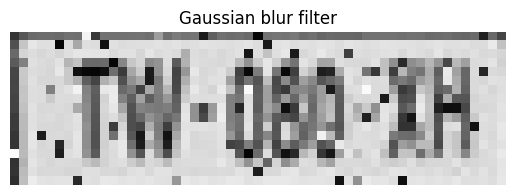

In [118]:
gaussian_blur_license_plate = cv2.GaussianBlur(license_plate.copy(), (5, 5), 0.3)

displayImage(gaussian_blur_license_plate, title='Gaussian blur filter')

Applying Laplacian filter.

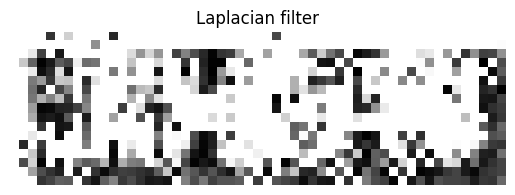

In [119]:
laplacian_license_plate = cv2.convertScaleAbs(cv2.Laplacian(gaussian_blur_license_plate, cv2.CV_64F, ksize=3))

displayImage(laplacian_license_plate, title='Laplacian filter')

Applying Mean Geometric filter.

(17, 55, 3)


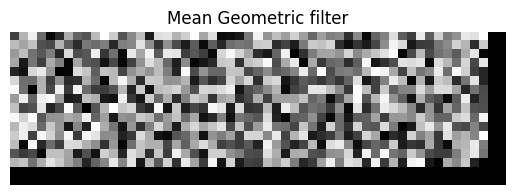

In [120]:
def meanGeometric(noised_image):
    res = np.zeros(noised_image.shape, np.uint8)
    
    print(noised_image.shape)
    
    for i in range(1, noised_image.shape[0] - 1):
        for j in range(1, noised_image.shape[1] - 1):
            kernel = noised_image[i-1:i+2, j-1:j+2]
            kernel = kernel.astype(np.float64)
            
            kernel_mul = np.prod(kernel)
            res[i - 1, j - 1] = kernel_mul ** (1 / (kernel.shape[0] * kernel.shape[1]))
            
    return res


mean_geometric_license_plate = meanGeometric(license_plate.copy())

displayImage(mean_geometric_license_plate, title='Mean Geometric filter')

Conclusions:<br>
 Gaussian blur and Mean 2D filter did the best with removing image noise.